In [1]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load Data

In [2]:
aes_data_dir = '/Volumes/TI27457/ttb/circuits/aes-logs'

# r=root, d=directories, f = files
aes_counter_logs = []
for r, d, f in os.walk(aes_data_dir):
    for filename in f:
        if '.ac.log' in filename and not filename.startswith("._") and 'tjfree' not in filename:
            aes_counter_logs.append(filename)

In [3]:
counter_data = {
    'Design'              : [],
    'Counter Type'        : [],
    'Num. Tests'          : [],
    'Coalesced Cntrs'     : [],
    'Distributed Cntrs'   : [],
    'Malicious Cntrs'     : [],
    'Cntrs Not Simulated' : []
}

for fname in aes_counter_logs:
    fname_list   = fname.split('.')
    design_name  = fname_list[0]
    counter_type = fname_list[1]
    num_tests    = fname_list[2]
    with open(aes_data_dir + '/' + fname, 'r') as stream:
        counter_data["Design"].append(design_name)
        counter_data["Counter Type"].append(counter_type)
        counter_data["Num. Tests"].append(num_tests)
        parsed = False
        for line in stream:
            line = line.rstrip()
            if "Num. Possible Coalesced:" in line:
                num_coalesced = int(line.split(':')[1])
                counter_data["Coalesced Cntrs"].append(num_coalesced)
                parsed = True
            elif "Num. Possible Distributed:" in line:
                num_distributed = int(line.split(':')[1])
                counter_data["Distributed Cntrs"].append(num_distributed)
                parsed = True
            elif "Num. Malicous:" in line:
                num_malicious = int(line.split(':')[1])
                counter_data["Malicious Cntrs"].append(num_malicious)
                parsed = True
            elif "Num. Not Simulated:" in line:
                num_not_simd = int(line.split(':')[1])
                counter_data["Cntrs Not Simulated"].append(num_not_simd)
                parsed = True
        if not parsed:
            print "ERROR: parsing", fname

# # DEBUG - Print Lenghts
# for key in counter_data.keys():
#     print key, "--", len(counter_data[key])  
# counter_data
counter_df = pd.DataFrame(counter_data)
counter_df

,Cntrs Not Simulated,Coalesced Cntrs,Counter Type,Design,Distributed Cntrs,Malicious Cntrs,Num. Tests
0,2,290,cdn,aes,406,352,1850
1,2,291,ddd,aes,408,452,1400
2,2,290,cdn,aes,406,410,1450
3,2,290,cdn,aes,406,353,1800
4,2,291,ddd,aes,408,661,1100
5,2,291,dnn,aes,406,384,1550
6,2,291,dnd,aes,408,603,1200
7,2,291,dnd,aes,408,353,2000
8,2,290,ddn,aes,406,360,1700
9,2,291,ddd,aes,408,603,1200


# Plot Settings

In [4]:
# Plot Settings
FIG_WIDTH                = 9
FIG_HEIGHT               = 5
AXIS_LABEL_FONTSIZE      = 16
AXIS_TICK_LABEL_FONTSIZE = 14
LEGEND_FONTSIZE          = 12
SAVE_AS_PDF              = True
PDF_FILENAME             = 'ttb_false_positives.pdf'

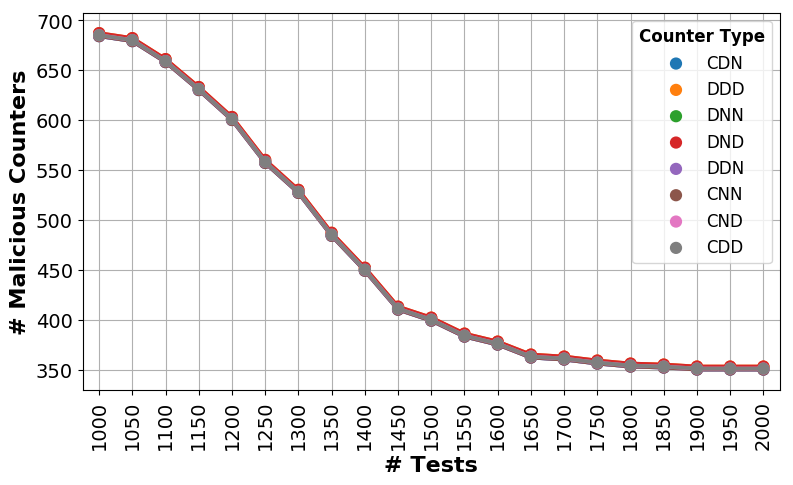

In [5]:
# Plot Net Blockage - Point Plot
fig, ax = plt.subplots(1, 1, figsize=(FIG_WIDTH,FIG_HEIGHT), dpi=100)
ax = sns.pointplot(x="Num. Tests", y="Malicious Cntrs", hue="Counter Type", data=counter_df, ax=ax, marker="o")

# Adjust Text
ax.grid()

# Set Legend
legend_handles, legend_labels = ax.get_legend_handles_labels()
ax.legend(legend_handles, map(lambda x: x.upper(), legend_labels), title="Counter Type", prop={'size':LEGEND_FONTSIZE})
legend = ax.get_legend()
legend.get_title().set_fontsize(LEGEND_FONTSIZE)
legend.get_title().set_fontweight('bold')

# Adjust Axes/Tick Label Formats 
ax.set_ylabel('# Malicious Counters', fontsize=AXIS_LABEL_FONTSIZE, fontweight='bold')
for y_tick in ax.yaxis.get_major_ticks():
    y_tick.label1.set_fontsize(AXIS_TICK_LABEL_FONTSIZE)
#     y_tick.label1.set_fontweight('bold')
ax.set_xlabel('# Tests', fontsize=AXIS_LABEL_FONTSIZE, fontweight='bold')
for x_tick in ax.xaxis.get_major_ticks():
    x_tick.label.set_rotation('vertical')
    x_tick.label1.set_fontsize(AXIS_TICK_LABEL_FONTSIZE)
#     x_tick.label1.set_fontweight('bold')
        
if SAVE_AS_PDF:
    plt.savefig(PDF_FILENAME, format='pdf')